In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Fraud Detection Dataset.csv')

In [3]:
data.head()

,Transaction ID,User ID,Transaction Amount,Transaction Date and Time,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address,...,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag
0,51595306,9822,163.08,2023-01-02 07:47:54,4044,ACH Transfer,KOR,Charity,GPS Device,42.23.223.120,...,26,2.71,United Kingdom,NOK,Consultation Fee,343,cox.co.uk,3,Bluetooth Authentication,0
1,85052974,4698,430.74,2021-09-12 15:15:41,4576,2Checkout,VNM,Cashback,Medical Device,39.52.212.120,...,60,3.95,Mexico,EGP,Cashback Reward,688,gmail.com,13,NFC Tag,1
2,23954324,8666,415.74,2023-01-12 17:25:58,4629,Google Wallet,MEX,Reward,Vehicle Infotainment System,243.180.236.29,...,81,3.81,Qatar,MXN,Acquisition,371,rocketmail.com,7,Token,1
3,44108303,9012,565.89,2021-02-27 11:31:00,3322,Check,SGP,Purchase,Kiosk,212.186.227.14,...,18,2.67,Spain,CLP,Loan Repayment,687,roadrunner.co.uk,15,Time-Based OTP,1
4,66622683,5185,955.49,2022-09-24 04:06:38,7609,Worldpay,HKG,Acquisition,Smart Mirror,166.113.10.199,...,98,3.19,Israel,RUB,Dividend Reinvestment,605,protonmail.co.uk,17,Password,1


In [4]:
data.columns

Index(['Transaction ID', 'User ID', 'Transaction Amount',
       'Transaction Date and Time', 'Merchant ID', 'Payment Method',
       'Country Code', 'Transaction Type', 'Device Type', 'IP Address',
       'Browser Type', 'Operating System', 'Merchant Category', 'User Age',
       'User Occupation', 'User Income', 'User Gender', 'User Account Status',
       'Transaction Status', 'Location Distance', 'Time Taken for Transaction',
       'Transaction Time of Day', 'User's Transaction History',
       'Merchant's Reputation Score', 'User's Device Location',
       'Transaction Currency', 'Transaction Purpose', 'User's Credit Score',
       'User's Email Domain', 'Merchant's Business Age',
       'Transaction Authentication Method', 'Fraudulent Flag'],
      dtype='object')

In [5]:
data.iloc[:, -1]

0          0
1          1
2          1
3          1
4          1
          ..
5999995    0
5999996    1
5999997    0
5999998    0
5999999    1
Name: Fraudulent Flag, Length: 6000000, dtype: int64

In [6]:
data['Transaction ID'].nunique()

5805013

In [7]:
len(data)

6000000

In [8]:
print('The different payment methods')
print(data['Payment Method'].unique())
print(data['Payment Method'].nunique())
print('\n')

print('The different country codes')
print(data['Country Code'].unique())
print(data['Country Code'].nunique())
print('\n')

print('The different transaction types')
print(data['Transaction Type'].unique())
print(data['Transaction Type'].nunique())
print('\n')

print('The different device type')
print(data['Device Type'].unique())
print(data['Device Type'].nunique())
print('\n')

print('The different Genders')
print(data['User Gender'].unique())
print(data['User Gender'].nunique())

The different payment methods
['ACH Transfer' '2Checkout' 'Google Wallet' 'Check' 'Worldpay'
 'Prepaid Card' 'Credit Card' 'Contactless Payment' 'Masterpass' 'Venmo'
 'E-check' 'NFC Payment' 'Direct Debit' 'Square Cash' 'Klarna' 'Afterpay'
 'Apple Pay' 'Visa Checkout' 'Neteller' 'Wire Transfer' 'Western Union'
 'Money Order' 'Stripe' 'Bank Transfer' 'Skrill' 'PayPal' 'Bitcoin'
 'Mobile Wallet' 'Discover' 'WeChat Pay' 'Diners Club' 'Alipay' 'Ethereum'
 'Cryptocurrency Wallet' 'Debit Card' 'Cash' 'JCB' 'Amazon Pay'
 'American Express' 'Payoneer']
40


The different country codes
['KOR' 'VNM' 'MEX' 'SGP' 'HKG' 'THA' 'CHE' 'CAN' 'TAI' 'QAT' 'JPN' 'USA'
 'BRA' 'IDN' 'EGY' 'GER' 'BEL' 'AUT' 'IND' 'NZL' 'NGA' 'ESP' 'SAU' 'ISR'
 'MAL' 'UK' 'NLD' 'SWE' 'FRA' 'AUS' 'ARG' 'GRE' 'CHN' 'NOR' 'TUR' 'RUS'
 'ITA' 'POL' 'UAE' 'ZAF']
40


The different transaction types
['Charity' 'Cashback' 'Reward' 'Purchase' 'Acquisition' 'Auction'
 'Admission' 'Dividend' 'Recharge' 'Rental' 'Donation' 'Royalty' 'Exp

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 32 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Transaction ID                     int64  
 1   User ID                            int64  
 2   Transaction Amount                 float64
 3   Transaction Date and Time          object 
 4   Merchant ID                        int64  
 5   Payment Method                     object 
 6   Country Code                       object 
 7   Transaction Type                   object 
 8   Device Type                        object 
 9   IP Address                         object 
 10  Browser Type                       object 
 11  Operating System                   object 
 12  Merchant Category                  object 
 13  User Age                           int64  
 14  User Occupation                    object 
 15  User Income                        float64
 16  User Gender       

### DATA CLEANING

In [10]:
#lets see the columns with missing values 
missing_columns = data.columns[data.isnull().any()]
missing_counts = data[missing_columns].isnull().sum()

# Print the columns with missing values and their respective counts
for column, count in missing_counts.items():
    print(f'Column "{column}" has {count} missing value(s).')

The code above shows that there are no columns with a missing value but just to be sure, I'd look into every cell to find out if there is a cell with missing values. This is done in the code below

In [11]:
if data.isna().any().any():
    print("There are missing values in the DataFrame.")
else:
    print("There are no missing values in the DataFrame.")

There are no missing values in the DataFrame.


Next, I'll check for duplicates 

In [12]:
data.duplicated().sum()

0

There are no duplicates in the dataset 

Now, it's time to drop some of the columns 

In [13]:
columns_to_drop = ['User ID', "User's Email Domain", 'IP Address']
data.drop(columns=columns_to_drop, inplace=True) 

### EXPLORATORY DATA ANALYSIS

First, I want to see the number of fraud activities and the number of legit activities then I'd compare them to one another, but before I do that I have to ensure that there is a column with unique values for me to use and verify the proportions. This would be shown below for better clarification.

In [14]:
data['Transaction ID'].nunique()

5805013

We can see now that the transaction column does not have complete unique values. Are these duplicates? or are they independent rows. The code below showcases this

In [15]:
column_to_filter = 'Transaction ID'
value_to_match = 50746565

# Filter and display rows where the specified column has the specified value
filtered_rows = data[data[column_to_filter] == value_to_match]

# Print the filtered rows
df = pd.DataFrame(filtered_rows)
df.head()

,Transaction ID,Transaction Amount,Transaction Date and Time,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,Browser Type,Operating System,...,Transaction Time of Day,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag
13,50746565,641.98,2022-06-28 12:09:26,1186,Google Wallet,IDN,Expense,Tablet,Konqueror,Unix,...,Nighttime,86,1.79,Sweden,AUD,Retail Purchase,373,11,Certificate-based Authentication,0
4469207,50746565,402.86,2023-06-14 14:51:13,4655,2Checkout,USA,Royalty,Robot,Chrome,macOS Server,...,Evening,68,3.35,Greece,KES,Interest Payment,712,2,Retina Scan,1


Now, from the two simple rows in the dataframe above, we can see that although the transaction IDs are the same, they do not hold the samme information. The next thing we would do is create a column that holds a unique for every row so we can use the column to get our proprtion 

In [16]:
data['Transaction_ID'] = range(1, len(data) + 1)


In [17]:
# lets check if the column has been created
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 30 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Transaction ID                     int64  
 1   Transaction Amount                 float64
 2   Transaction Date and Time          object 
 3   Merchant ID                        int64  
 4   Payment Method                     object 
 5   Country Code                       object 
 6   Transaction Type                   object 
 7   Device Type                        object 
 8   Browser Type                       object 
 9   Operating System                   object 
 10  Merchant Category                  object 
 11  User Age                           int64  
 12  User Occupation                    object 
 13  User Income                        float64
 14  User Gender                        object 
 15  User Account Status                object 
 16  Transaction Status

Now, we can use the Transaction ID column we created for the analysis as seen below

In [18]:
total_bids = data['Transaction_ID'].nunique()

# proportions
legitimate = len(data[data['Fraudulent Flag'] == 0.0])
fraudulent = len(data[data['Fraudulent Flag'] == 1.0])

legit = legitimate/total_bids
fraud = fraudulent/total_bids

# print
print("Proportion of legitimate bids: {:.2%}".format(legit))
print("Proportion of fraudulent bids: {:.2%}".format(fraud))

Proportion of legitimate bids: 50.00%
Proportion of fraudulent bids: 50.00%


Now, let's view this properly with a pie chart

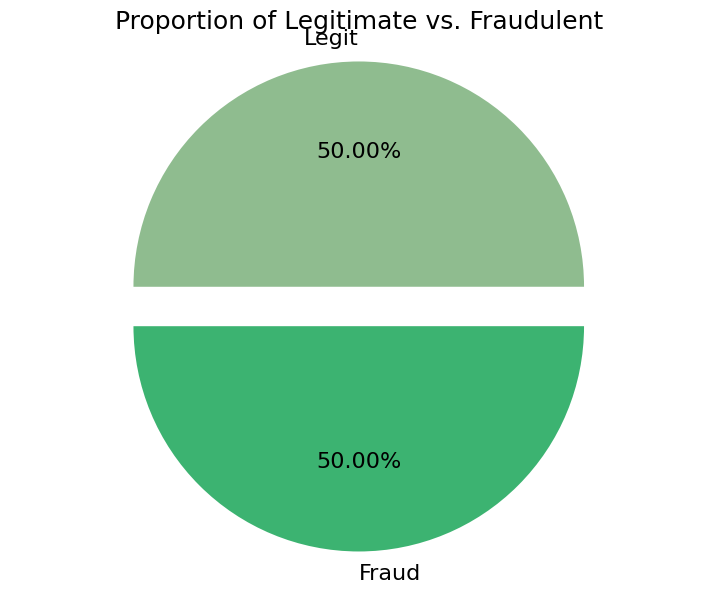

In [19]:

colors = ['darkseagreen', 'mediumseagreen']

# Create a figure and axis
_, ax = plt.subplots(figsize=(9, 7))

# Pie chart parameters
pie_data = [legit, fraud]
pie_labels = ('Legit', 'Fraud')
pie_labels_explode_coefficients = (0, 0.175)

# Show the chart
ax.pie(pie_data, labels=pie_labels, autopct='%1.2f%%', colors=colors,
       shadow=False, explode=pie_labels_explode_coefficients, textprops={'fontsize': 16})
ax.set_title("Proportion of Legitimate vs. Fraudulent", fontsize=18)
plt.axis('equal')
plt.show()

As seen from the chart above, we have a balanced data. The number frudulent data and legitimate data are both equal but to be sure, lets look at this using a histogram too

([<matplotlib.axis.XTick at 0x169c54bd0>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

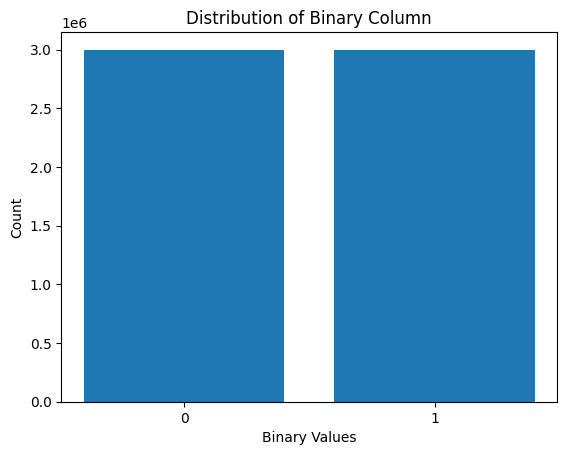

In [20]:
# Calculate value counts
value_counts = data['Fraudulent Flag'].value_counts()

# Create a bar plot
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Binary Values')
plt.ylabel('Count')
plt.title('Distribution of Binary Column')
plt.xticks(value_counts.index, ['0', '1']) 

The 'Fraudulent Flag' column is normally distributed

Using charts, lets see some of the properties of the data

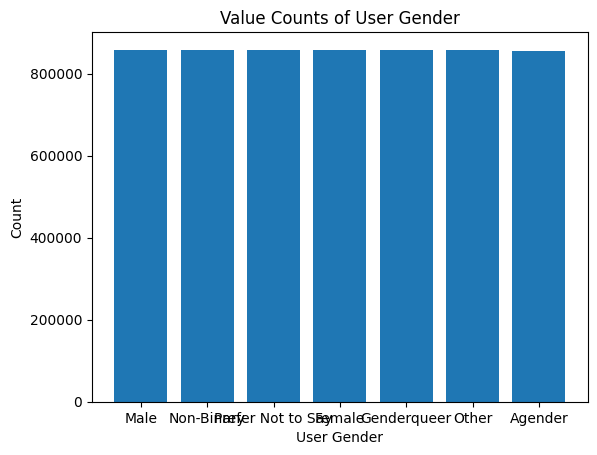

In [21]:
value_counts = data['User Gender'].value_counts()

# Create a bar chart to visualize the counts
plt.bar(value_counts.index, value_counts.values)

# Add labels and a title
plt.xlabel('User Gender')
plt.ylabel('Count')
plt.title('Value Counts of User Gender')

# Show the plot
plt.show()

Now, let's look at the spread of the data 

Let's look at the mean, median and mode of some of the numerical data

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 30 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Transaction ID                     int64  
 1   Transaction Amount                 float64
 2   Transaction Date and Time          object 
 3   Merchant ID                        int64  
 4   Payment Method                     object 
 5   Country Code                       object 
 6   Transaction Type                   object 
 7   Device Type                        object 
 8   Browser Type                       object 
 9   Operating System                   object 
 10  Merchant Category                  object 
 11  User Age                           int64  
 12  User Occupation                    object 
 13  User Income                        float64
 14  User Gender                        object 
 15  User Account Status                object 
 16  Transaction Status

In [23]:
# grouped data
data_grouped_by = data.groupby(['Transaction_ID'])

# columns to loop through
features = [('Payment Methods', 'Payment Method'), ('Device Types', 'Device Type'), ('User Ages', 'User Age'), 
                     ('User Occupations', 'User Occupation'), ('User Incomes', 'User Income'), ("Merchant's Reputation Scores", "Merchant's Reputation Score")]

feature_stats = {}

for name, column in features:
    stats = data_grouped_by[column].nunique()
    feature_stats[column] = stats

    # calculate mean, median, mode, min and max for humans and robots
    print("Mean of {} per user: {:.2f}".format(name, stats.mean()))
    print("Median of {} per user: {}".format(name, stats.median()))
    print("Mode of {} per user: {}".format(name, stats.mode()[0]))
    print("User with more {}: {}".format(name, stats.max()))
    print("User with less {}: {}".format(name, stats.min()))
    print('----------------------------------')

Mean of Payment Methods per user: 1.00
Median of Payment Methods per user: 1.0
Mode of Payment Methods per user: 1
User with more Payment Methods: 1
User with less Payment Methods: 1
----------------------------------
Mean of Device Types per user: 1.00
Median of Device Types per user: 1.0
Mode of Device Types per user: 1
User with more Device Types: 1
User with less Device Types: 1
----------------------------------
Mean of User Ages per user: 1.00
Median of User Ages per user: 1.0
Mode of User Ages per user: 1
User with more User Ages: 1
User with less User Ages: 1
----------------------------------
Mean of User Occupations per user: 1.00
Median of User Occupations per user: 1.0
Mode of User Occupations per user: 1
User with more User Occupations: 1
User with less User Occupations: 1
----------------------------------
Mean of User Incomes per user: 1.00
Median of User Incomes per user: 1.0
Mode of User Incomes per user: 1
User with more User Incomes: 1
User with less User Incomes: 1


From the results above, we can see that our data isn't skewed. We most likely  have a normally distributed data but I still want to see this using charts 

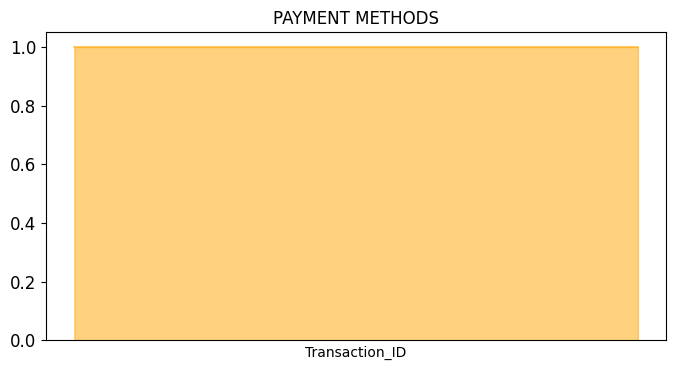

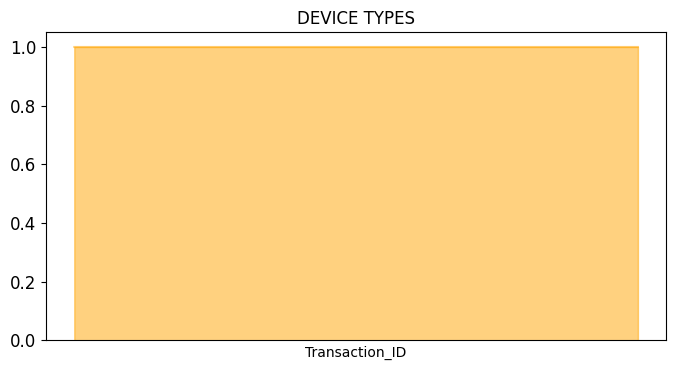

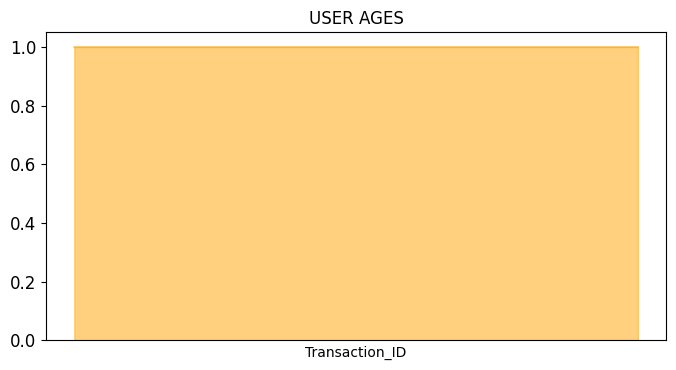

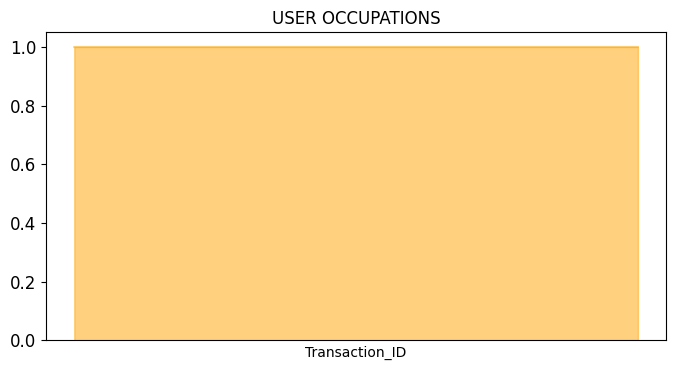

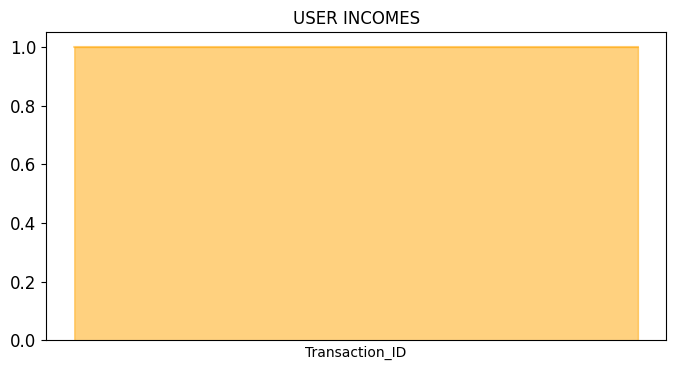

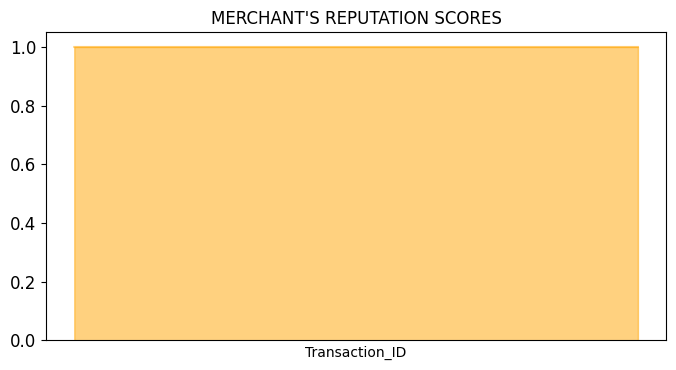

In [24]:
color = ['orange']

for feat, column in features:
    plt.figure(figsize=(8,4))
    plt.xticks([])
    feature_stats[column].plot.area(color=color, 
                                        title=feat.upper(), fontsize=12,
                                       stacked=False)
    plt.show()

Now, let's do a fraudulent/legit comparison

__Payment Method__

In [25]:
# First, I'll go for the Payment method 

data['Payment Method'].unique()

array(['ACH Transfer', '2Checkout', 'Google Wallet', 'Check', 'Worldpay',
       'Prepaid Card', 'Credit Card', 'Contactless Payment', 'Masterpass',
       'Venmo', 'E-check', 'NFC Payment', 'Direct Debit', 'Square Cash',
       'Klarna', 'Afterpay', 'Apple Pay', 'Visa Checkout', 'Neteller',
       'Wire Transfer', 'Western Union', 'Money Order', 'Stripe',
       'Bank Transfer', 'Skrill', 'PayPal', 'Bitcoin', 'Mobile Wallet',
       'Discover', 'WeChat Pay', 'Diners Club', 'Alipay', 'Ethereum',
       'Cryptocurrency Wallet', 'Debit Card', 'Cash', 'JCB', 'Amazon Pay',
       'American Express', 'Payoneer'], dtype=object)

In [26]:
payment_df = data[['Payment Method', 'Fraudulent Flag']]

# Creating a pivot table with payment method as index, outcome as columns and count of fraudulent flag as values 
payment_human_bot = payment_df.pivot_table(values='Fraudulent Flag', index='Payment Method', columns='Fraudulent Flag', fill_value=0, 
                         aggfunc=lambda x: len(x))

# Passing the pivot table to heatmap for visualization
payment_human_bot.style.background_gradient(cmap ='Blues', axis=0)

Fraudulent Flag,0,1
Payment Method,,
2Checkout,75292,74823
ACH Transfer,74652,74934
Afterpay,75347,75223
Alipay,75293,75073
Amazon Pay,75327,75454
American Express,74794,75170
Apple Pay,74916,75227
Bank Transfer,74923,75165
Bitcoin,74733,75343


__Device Type__

In [27]:
device_df = data[['Device Type', 'Fraudulent Flag']]

# Creating a pivot table with device type as index, outcome as columns and count of fraudulent flag as values 
device_human_bot = device_df.pivot_table(values='Fraudulent Flag', index='Device Type', columns='Fraudulent Flag', fill_value=0, 
                         aggfunc=lambda x: len(x))

# Passing the pivot table to heatmap for visualization
device_human_bot.style.background_gradient(cmap ='Blues', axis=0)

Fraudulent Flag,0,1
Device Type,,
ATM,78858,79140
Augmented Reality Glasses,78858,78943
Barcode Scanner,78957,79152
Cash Register,79468,78996
Desktop,79084,78523
Digital Camera,78319,78709
Drone,78989,79181
E-Reader,78721,79026
Embedded System,79108,78525


__Browzer Type__

In [28]:
browser_df = data[['Browser Type', 'Fraudulent Flag']]

# Creating a pivot table with browzer as index, outcome as columns and count of fraudulent as values 
browser_human_bot = browser_df.pivot_table(values='Fraudulent Flag', index='Browser Type', columns='Fraudulent Flag', fill_value=0, 
                         aggfunc=lambda x: len(x))

# Passing the pivot table to heatmap for visualization
browser_human_bot.style.background_gradient(cmap ='Blues', axis=0)

Fraudulent Flag,0,1
Browser Type,,
Avant Browser,74715,75281
Basilisk,75264,74839
Beaker,74622,75027
Brave,75025,75287
Browsh,74745,74799
Chrome,75445,74592
Chromium,74938,75293
Dooble,74961,74631
ELinks,74970,74791


__Operating System__

In [29]:
operating_df = data[['Operating System', 'Fraudulent Flag']]

# Creating a pivot table with operating system as index, outcome as columns and count of fraudulent as values 
operating_human_bot = operating_df.pivot_table(values='Fraudulent Flag', index='Operating System', columns='Fraudulent Flag', fill_value=0, 
                         aggfunc=lambda x: len(x))

# Passing the pivot table to heatmap for visualization
operating_human_bot.style.background_gradient(cmap ='Blues', axis=0)

Fraudulent Flag,0,1
Operating System,,
AIX,75244,75136
Android,75385,75077
Android TV,74784,74862
Android Wear,74905,75520
Arch Linux,74543,74908
BlackBerry,74963,74910
CentOS,74844,75284
Chrome OS,75521,74846
Chromebook,74807,75210


__Merchant Category__

In [30]:
merchant_df = data[['Merchant Category', 'Fraudulent Flag']]

# Creating a pivot table with Merchant category as index, outcome as columns and count of fraudulent as values 
merchant_human_bot = merchant_df.pivot_table(values='Fraudulent Flag', index='Merchant Category', columns='Fraudulent Flag', fill_value=0, 
                         aggfunc=lambda x: len(x))

# Passing the pivot table to heatmap for visualization
merchant_human_bot.style.background_gradient(cmap ='Blues', axis=0)

Fraudulent Flag,0,1
Merchant Category,,
Appliances,74975,74903
Art & Collectibles,74620,75280
Automotive,74980,75035
Baby & Maternity,74701,74807
Beauty & Cosmetics,75101,74526
Books & Literature,75717,74766
Charity & Nonprofit,75279,75155
Clothing,75227,74647
Education,74950,75508


__User Occupation__

In [31]:
occ_df = data[['User Occupation', 'Fraudulent Flag']]

# Creating a pivot table with occupation as index, outcome as columns and count of fraudulent as values 
occ_human_bot = occ_df.pivot_table(values='Fraudulent Flag', index='User Occupation', columns='Fraudulent Flag', fill_value=0, 
                         aggfunc=lambda x: len(x))

# Passing the pivot table to heatmap for visualization
occ_human_bot.style.background_gradient(cmap ='Blues', axis=0)

Fraudulent Flag,0,1
User Occupation,,
Accountant,115493,115537
Architect,115031,114775
Artist,115628,114713
Biologist,115537,115259
Chef,115021,115730
Chemist,116023,114688
Counselor,115287,115367
Doctor,114854,115263
Electrician,115495,115345


__User Gender__

In [32]:
gen_df = data[['User Gender', 'Fraudulent Flag']]

# Creating a pivot table with gender as index, fraudulent flag as columns and count of fraudulent as values 
gen_human_bot = gen_df.pivot_table(values='Fraudulent Flag', index='User Gender', columns='Fraudulent Flag', fill_value=0, 
                         aggfunc=lambda x: len(x))

# Passing the pivot table to heatmap for visualization
gen_human_bot.style.background_gradient(cmap ='Blues', axis=0)

Fraudulent Flag,0,1
User Gender,,
Agender,427683,428468
Female,429264,427641
Genderqueer,428121,428727
Male,428893,429405
Non-Binary,429004,429056
Other,428243,428311
Prefer Not to Say,428886,428298


__Transaction time of day__

In [33]:
tran_df = data[['Transaction Time of Day', 'Fraudulent Flag']]

# Creating a pivot table with gender as index, fraudulent flag as columns and count of fraudulent as values 
tran_human_bot = tran_df.pivot_table(values='Fraudulent Flag', index='Transaction Time of Day', columns='Fraudulent Flag', fill_value=0, 
                         aggfunc=lambda x: len(x))

# Passing the pivot table to heatmap for visualization
tran_human_bot.style.background_gradient(cmap ='Blues', axis=0)

Fraudulent Flag,0,1
Transaction Time of Day,,
Daytime,999496,999099
Evening,999482,1000743
Nighttime,1001116,1000064


__User's Device Location__

In [34]:
loc_df = data[["User's Device Location", 'Fraudulent Flag']]

# Creating a pivot table with device location as index, fraudulent flag as columns and count of fraudulent as values 
loc_human_bot = loc_df.pivot_table(values='Fraudulent Flag', index="User's Device Location", columns='Fraudulent Flag', fill_value=0, 
                         aggfunc=lambda x: len(x))

# Passing the pivot table to heatmap for visualization
loc_human_bot.style.background_gradient(cmap ='Blues', axis=0)

Fraudulent Flag,0,1
User's Device Location,,
Argentina,75121,74697
Australia,74630,74762
Austria,74574,74979
Belgium,74635,74675
Brazil,74559,75312
Canada,74973,75192
China,75178,74922
Egypt,74387,74547
France,74180,74810


__Transaction Currency__

In [35]:
curr_df = data[["Transaction Currency", 'Fraudulent Flag']]

# Creating a pivot table with currency as index, fraudulent flag as columns and count of fraudulent as values 
curr_human_bot = curr_df.pivot_table(values='Fraudulent Flag', index="Transaction Currency", columns='Fraudulent Flag', fill_value=0, 
                         aggfunc=lambda x: len(x))

# Passing the pivot table to heatmap for visualization
curr_human_bot.style.background_gradient(cmap ='Blues', axis=0)

Fraudulent Flag,0,1
Transaction Currency,,
AED,75148,74672
ARS,74772,75264
AUD,75132,75221
BRL,75078,74245
CAD,74745,74803
CHF,74951,74934
CLP,75057,75517
CNY,75112,74884
COP,75382,74859


__Transaction Authentication Mode__

In [36]:
auth_df = data[["Transaction Authentication Method", 'Fraudulent Flag']]

# Creating a pivot table with currency as index, fraudulent flag as columns and count of fraudulent as values 
auth_human_bot = auth_df.pivot_table(values='Fraudulent Flag', index="Transaction Authentication Method", columns='Fraudulent Flag', fill_value=0, 
                         aggfunc=lambda x: len(x))

# Passing the pivot table to heatmap for visualization
auth_human_bot.style.background_gradient(cmap ='Blues', axis=0)

Fraudulent Flag,0,1
Transaction Authentication Method,,
Authentication App,76922,76703
Behavioral Analytics,77349,77067
Behavioral Biometrics,77122,77035
Biometric Card,77314,76526
Biometric Scan,77073,76808
Bluetooth Authentication,76547,76553
CAPTCHA,76690,76599
Certificate-based Authentication,76591,77088
Email Verification,77019,77081


Across the different variables visualised, we can see that the number of fraudulent transactions is within the same range with the legit  transactions

__Now, let's see the distribution of the fraudulent transactions and legitimate transactions__

__LEGITIMATE TRANSACTIONS__ 

In [37]:
data.columns

Index(['Transaction ID', 'Transaction Amount', 'Transaction Date and Time',
       'Merchant ID', 'Payment Method', 'Country Code', 'Transaction Type',
       'Device Type', 'Browser Type', 'Operating System', 'Merchant Category',
       'User Age', 'User Occupation', 'User Income', 'User Gender',
       'User Account Status', 'Transaction Status', 'Location Distance',
       'Time Taken for Transaction', 'Transaction Time of Day',
       'User's Transaction History', 'Merchant's Reputation Score',
       'User's Device Location', 'Transaction Currency', 'Transaction Purpose',
       'User's Credit Score', 'Merchant's Business Age',
       'Transaction Authentication Method', 'Fraudulent Flag',
       'Transaction_ID'],
      dtype='object')

In [38]:
legits = data[data['Fraudulent Flag'] == 0]
data_grouped_by_trans = legits.groupby(['Transaction_ID'])

features = [('Transaction Amounts', 'Transaction Amount'), ('Payment Methods', 'Payment Method'), ('Country Codes', 'Country Code'), 
                     ('Transaction Types', 'Transaction Type'), ('Device Types', 'Device Type'), ('Operating Systems', 'Operating System'), 
                    ('Merchant Categorys', 'Merchant Category'), ('User Ages', 'User Age'), ('User Occupations','User Occupation'), 
            ('User Incomes', 'User Income'), ('User Genders', 'User Gender'), ('User Account Statuss','User Account Status'),
            ('Transaction Statuss','Transaction Status'), ('Location Distances','Location Distance'), ('Time Taken for Transactions', 'Time Taken for Transaction'),
            ('Transaction Time of Days','Transaction Time of Day'), ("User's Transaction Historys", "User's Transaction History"),
            ("Merchant's Reputation Scores", "Merchant's Reputation Score"), ("User's Device Locations", "User's Device Location"),
            ('Transaction Currencys', 'Transaction Currency'), ('Transaction Purposes', 'Transaction Purpose'), ("User's Credit Scores", "User's Credit Score"),
             ("Merchant's Business Ages", "Merchant's Business Age"), ('Transaction Authentication Methods', 'Transaction Authentication Method')]

feature_stats_legit = {}

for name, column in features:
    stats = data_grouped_by_trans[column].nunique()
    feature_stats_legit[column] = stats
    
    # calculate mean, median, mode, min and max for humans
    print("Mean of {} per human: {:.2f}".format(name, stats.mean()))
    print("Median of {} per human: {}".format(name, stats.median()))
    print("Mode of {} per human: {}".format(name, stats.mode()[0]))
    print("Human user with more {}: {}".format(name, stats.max()))
    print("Human user with less {}: {}".format(name, stats.min()))
    print("-----------------------------")

Mean of Transaction Amounts per human: 1.00
Median of Transaction Amounts per human: 1.0
Mode of Transaction Amounts per human: 1
Human user with more Transaction Amounts: 1
Human user with less Transaction Amounts: 1
-----------------------------
Mean of Payment Methods per human: 1.00
Median of Payment Methods per human: 1.0
Mode of Payment Methods per human: 1
Human user with more Payment Methods: 1
Human user with less Payment Methods: 1
-----------------------------
Mean of Country Codes per human: 1.00
Median of Country Codes per human: 1.0
Mode of Country Codes per human: 1
Human user with more Country Codes: 1
Human user with less Country Codes: 1
-----------------------------
Mean of Transaction Types per human: 1.00
Median of Transaction Types per human: 1.0
Mode of Transaction Types per human: 1
Human user with more Transaction Types: 1
Human user with less Transaction Types: 1
-----------------------------
Mean of Device Types per human: 1.00
Median of Device Types per huma

It is normally distributed. Now, lets see for the fraudulent transactions 

__FRAUDULENT TRANSACTIONS__

In [39]:
frauds = data[data['Fraudulent Flag'] == 1]
data_grouped_by_trans = frauds.groupby(['Transaction_ID'])

features = [('Transaction Amounts', 'Transaction Amount'), ('Payment Methods', 'Payment Method'), ('Country Codes', 'Country Code'), 
                     ('Transaction Types', 'Transaction Type'), ('Device Types', 'Device Type'), ('Operating Systems', 'Operating System'), 
                    ('Merchant Categorys', 'Merchant Category'), ('User Ages', 'User Age'), ('User Occupations','User Occupation'), 
            ('User Incomes', 'User Income'), ('User Genders', 'User Gender'), ('User Account Statuss','User Account Status'),
            ('Transaction Statuss','Transaction Status'), ('Location Distances','Location Distance'), ('Time Taken for Transactions', 'Time Taken for Transaction'),
            ('Transaction Time of Days','Transaction Time of Day'), ("User's Transaction Historys", "User's Transaction History"),
            ("Merchant's Reputation Scores", "Merchant's Reputation Score"), ("User's Device Locations", "User's Device Location"),
            ('Transaction Currencys', 'Transaction Currency'), ('Transaction Purposes', 'Transaction Purpose'), ("User's Credit Scores", "User's Credit Score"),
             ("Merchant's Business Ages", "Merchant's Business Age"), ('Transaction Authentication Methods', 'Transaction Authentication Method')]

feature_stats_fraud = {}

for name, column in features:
    stats = data_grouped_by_trans[column].nunique()
    feature_stats_fraud[column] = stats
    
    # calculate mean, median, mode, min and max for frauds
    print("Mean of {} per human: {:.2f}".format(name, stats.mean()))
    print("Median of {} per human: {}".format(name, stats.median()))
    print("Mode of {} per human: {}".format(name, stats.mode()[0]))
    print("Human user with more {}: {}".format(name, stats.max()))
    print("Human user with less {}: {}".format(name, stats.min()))
    print("-----------------------------")

Mean of Transaction Amounts per human: 1.00
Median of Transaction Amounts per human: 1.0
Mode of Transaction Amounts per human: 1
Human user with more Transaction Amounts: 1
Human user with less Transaction Amounts: 1
-----------------------------
Mean of Payment Methods per human: 1.00
Median of Payment Methods per human: 1.0
Mode of Payment Methods per human: 1
Human user with more Payment Methods: 1
Human user with less Payment Methods: 1
-----------------------------
Mean of Country Codes per human: 1.00
Median of Country Codes per human: 1.0
Mode of Country Codes per human: 1
Human user with more Country Codes: 1
Human user with less Country Codes: 1
-----------------------------
Mean of Transaction Types per human: 1.00
Median of Transaction Types per human: 1.0
Mode of Transaction Types per human: 1
Human user with more Transaction Types: 1
Human user with less Transaction Types: 1
-----------------------------
Mean of Device Types per human: 1.00
Median of Device Types per huma

The legitimate transactions are also normally distributed

### FEATURE ENGINEERING 

In [40]:
import warnings
warnings.filterwarnings('ignore')

Now, lets get out the feature and target variable (the independent and dependent variables) and assign them to the input and output variables 

In [41]:
 independent = ['Transaction Amount', 'Merchant ID', 'Payment Method', 'Country Code', 'Transaction Type',
       'Device Type', 'Browser Type', 'Operating System', 'Merchant Category',
       'User Age', 'User Occupation', 'User Income', 'User Gender',
       'User Account Status', 'Transaction Status', 'Location Distance',
       'Time Taken for Transaction', 'Transaction Time of Day',
      "User's Transaction History", "Merchant's Reputation Score",
       "User's Device Location", 'Transaction Currency', 'Transaction Purpose',
       "User's Credit Score", "Merchant's Business Age",
       'Transaction Authentication Method']

In [42]:
dependent = [ 'Fraudulent Flag']

In [43]:
x = data[independent]

y = data[dependent]

Now, let's encode the independent categorical variables 

In [ ]:
categorical

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()
for col in independent:
    if len(x[col].unique()) <= 50:  # Adjust the threshold as needed
        encoded_data[col] = label_encoder.fit_transform(x[col])

# Apply one-hot encoding to categorical columns with a large number of unique values
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
for col in independent:
    if len(x[col].unique()) > 50:  # Adjust the threshold as needed
        one_hot_encoded = one_hot_encoder.fit_transform(x[[col]])
        col_names = one_hot_encoder.get_feature_names_out([col])
        encoded_data = pd.concat([encoded_data, pd.DataFrame(one_hot_encoded, columns=col_names)], axis=1)
        encoded_data.drop(col, axis=1, inplace=True)

In [ ]:
data.groupby(['SubjectName'])['Target'].count()

df_encoded = independent
df_encoded = pd.get_dummies(df_encoded, columns=cat_vars, sparse=True)

Now, we encode the dependent variable

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

Now, lets split the dataset to train and test 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)